In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
snmp_results_path = '../output/testing_snmp_results_extended.csv'
column_names = ["Domain", "IP", "AuthoritativeEngineBoots", "AuthoritativeEngineTimes", "EngineID", "country_of_IP"]

def remove_first_last(group):
    return group.iloc[1:-1]

df = pd.read_csv(snmp_results_path)
df = df.groupby('Domain').apply(remove_first_last).reset_index(drop=True)
df_netherlands = df[df['country_of_IP'] == 'Netherlands (Kingdom of the)']

df_no_errors = df[df['AuthoritativeEngineBoots'] != 'Error']
df_unique_no_errors = df_no_errors.drop_duplicates(subset=['IP', 'EngineID'], keep='first')
df_unique = df.drop_duplicates(subset=['IP', 'EngineID'], keep='first')
df_unique_netherlands = df_netherlands.drop_duplicates(subset=['IP', 'EngineID'], keep='first')
df_unique_netherlands_no_errors = df_unique_netherlands[df_unique_netherlands['AuthoritativeEngineBoots'] != 'Error']

print("Total IPs: ", len(df))
print("Unique IPs: ", len(df_unique))
print("Unique IPs that responded to SNMP: ", len(df_unique_no_errors))
print("Unique IPs in the Netherlands: ", len(df_unique_netherlands))
print("Unique IPs in the Netherlands that responded to SNMP: ", len(df_unique_netherlands_no_errors))

Total IPs:  192737
Unique IPs:  38278
Unique IPs that responded to SNMP:  2304
Unique IPs in the Netherlands:  1464
Unique IPs in the Netherlands that responded to SNMP:  88


/tmp/ipykernel_306545/2329411036.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Domain').apply(remove_first_last).reset_index(drop=True)


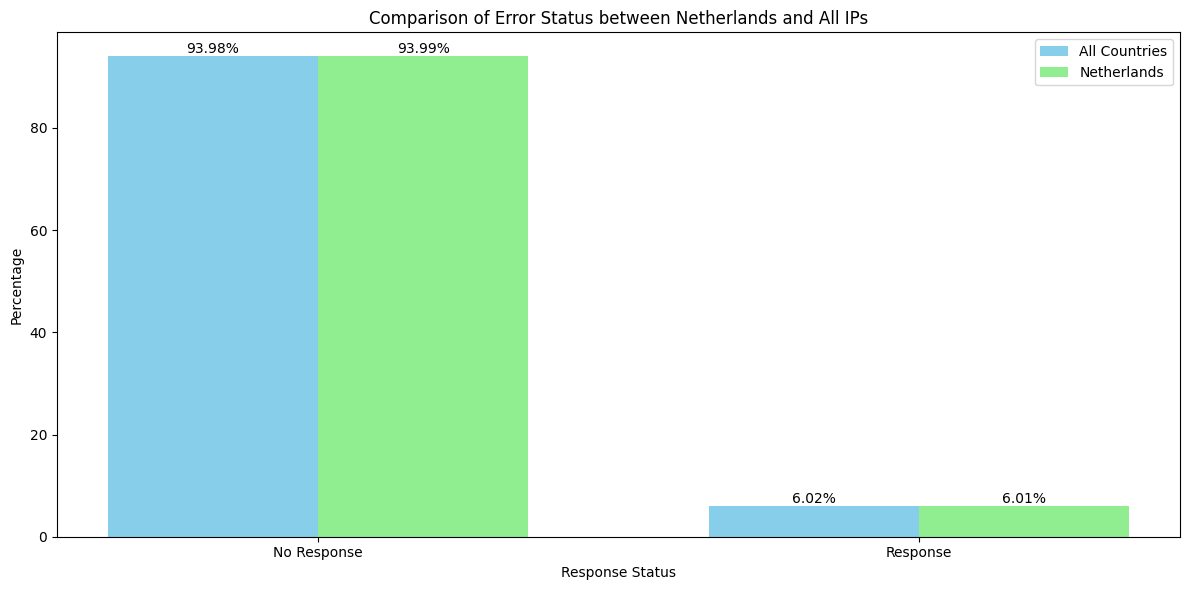

In [5]:
total_rows = len(df_unique)
error_percentage_total = (df_unique[df_unique['AuthoritativeEngineBoots'] == 'Error'].shape[0] / total_rows) * 100
non_error_percentage_total = (df_unique[df_unique['AuthoritativeEngineBoots'] != 'Error'].shape[0] / total_rows) * 100

# Calculate percentages for Netherlands data
total_rows_netherlands = len(df_unique_netherlands)
error_percentage_netherlands = (df_unique_netherlands[df_unique_netherlands['AuthoritativeEngineBoots'] == 'Error'].shape[0] / total_rows_netherlands) * 100
non_error_percentage_netherlands = (df_unique_netherlands[df_unique_netherlands['AuthoritativeEngineBoots'] != 'Error'].shape[0] / total_rows_netherlands) * 100

plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.35

# Plotting histogram for All Countries
plt.bar(np.arange(2), [error_percentage_total, non_error_percentage_total], bar_width, color='skyblue', label='All Countries')

# Plotting histogram for Netherlands
plt.bar(np.arange(2) + bar_width, [error_percentage_netherlands, non_error_percentage_netherlands], bar_width, color='lightgreen', label='Netherlands')

plt.xlabel('Response Status')
plt.ylabel('Percentage')
plt.title('Comparison of Error Status between Netherlands and All IPs')
plt.xticks(np.arange(2) + bar_width / 2, ['No Response', 'Response'])
plt.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# Call the function to add labels for both bars1 and bars2
add_labels(plt.bar(np.arange(2), [error_percentage_total, non_error_percentage_total], bar_width, color='skyblue', alpha=0.5))
add_labels(plt.bar(np.arange(2) + bar_width, [error_percentage_netherlands, non_error_percentage_netherlands], bar_width, color='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

In [41]:
ip_count_per_engine = df_no_errors.groupby('EngineID')['IP'].nunique().sort_values(ascending=False)
duplicates = ip_count_per_engine[ip_count_per_engine > 1]

print("EngineID with multiple IPs:")
for engine_id, count in duplicates.items():
    group_df = df_no_errors[df_no_errors['EngineID'] == engine_id]
    print(f"EngineID: {engine_id}, Count: {count}")
    print(group_df['IP'].unique())
    print()

EngineID with multiple IPs:
EngineID: 80003a8c04, Count: 116
['201.219.153.33' '138.204.228.1' '190.106.72.81' '103.215.229.1'
 '185.229.28.5' '79.110.170.1' '185.206.239.121' '203.123.48.6'
 '122.186.81.46' '103.215.228.1' '103.147.52.91' '203.89.31.29'
 '103.170.24.254' '103.170.24.250' '216.218.134.82' '103.41.247.97'
 '103.141.61.129' '202.152.129.73' '202.152.153.25' '202.70.133.1'
 '103.158.58.170' '103.141.61.140' '103.36.9.239' '185.134.197.90'
 '103.136.36.17' '109.236.114.2' '62.122.136.82' '170.254.172.1'
 '45.68.35.209' '45.5.10.9' '187.44.229.13' '185.15.253.5'
 '160.119.224.18' '138.204.228.160' '185.52.244.2' '195.82.134.9'
 '171.22.27.1' '213.135.160.14' '185.15.252.7' '154.66.88.153'
 '154.66.88.186' '45.222.95.19' '45.222.95.50' '45.222.64.13'
 '192.165.136.1' '37.153.194.33' '185.119.254.1' '103.147.52.49'
 '45.68.35.253' '46.249.122.97' '76.9.215.22' '154.51.12.33'
 '169.239.165.209' '45.13.105.254' '169.255.112.34' '190.113.92.33'
 '186.163.16.42' '84.16.69.17' '45

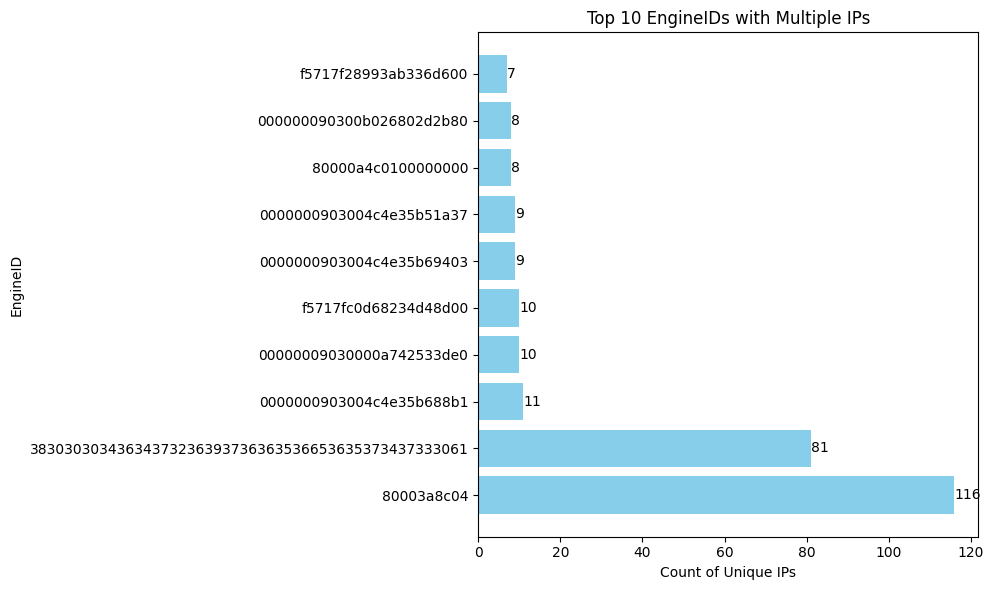

In [42]:
# Number of top EngineIDs to display
top_n = 10  # You can adjust this value according to your preference

# Selecting top N EngineIDs
top_engine_ids = duplicates.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_engine_ids.index, top_engine_ids.values, color='skyblue')

# Adding labels
plt.xlabel('Count of Unique IPs')
plt.ylabel('EngineID')
plt.title(f'Top {top_n} EngineIDs with Multiple IPs')

# Function to add labels on each bar
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center')

add_labels(bars)  # Call the function to add labels
plt.tight_layout()

# Show plot
plt.show()

In [43]:
# Grouping by EngineID and counting unique IPs for the Netherlands
ip_count_per_engine_nl = df_netherlands.groupby('EngineID')['IP'].nunique().sort_values(ascending=False)

# Selecting only those with multiple IPs
duplicates_nl = ip_count_per_engine_nl[ip_count_per_engine_nl > 1]

# Printing EngineIDs with multiple IPs and their respective IPs
print("EngineID with multiple IPs in the Netherlands:")
for engine_id, count in duplicates_nl.items():
    group_df = df_netherlands[df_netherlands['EngineID'] == engine_id]
    print(f"EngineID: {engine_id}, Count: {count}")
    print(group_df['IP'].unique())
    print()

EngineID with multiple IPs in the Netherlands:
EngineID: Error, Count: 1376
['4.69.162.177' '212.72.43.138' '51.158.138.1' ... '213.51.166.13'
 '81.17.34.71' '178.18.225.43']

EngineID: 0000197f00005c8382d50ac4, Count: 5
['37.139.139.24' '149.11.46.170' '128.241.10.105' '195.219.150.31'
 '37.139.139.5']

EngineID: 8000000903a09351b7612e, Count: 4
['51.158.143.78' '51.158.143.70' '51.158.143.76' '51.15.32.150']

EngineID: 00000009030010f31101cdc8, Count: 4
['46.20.253.38' '46.20.242.161' '46.20.247.168' '46.20.253.14']

EngineID: 00000009030028c7cebb7698, Count: 4
['46.20.254.121' '46.20.254.192' '46.20.246.185' '46.20.246.161']

EngineID: 00000009030050878921af78, Count: 4
['46.20.253.22' '46.20.254.172' '46.20.254.232' '46.20.248.167']

EngineID: 000000090300a80c0d7141ef, Count: 3
['46.20.240.142' '46.20.247.169' '46.20.254.114']

EngineID: 00009e25fe8404f6a3794ab9, Count: 3
['51.158.143.43' '51.158.143.75' '51.158.143.71']

EngineID: 8000000903a09351a2df6a, Count: 3
['51.158.143.66' 

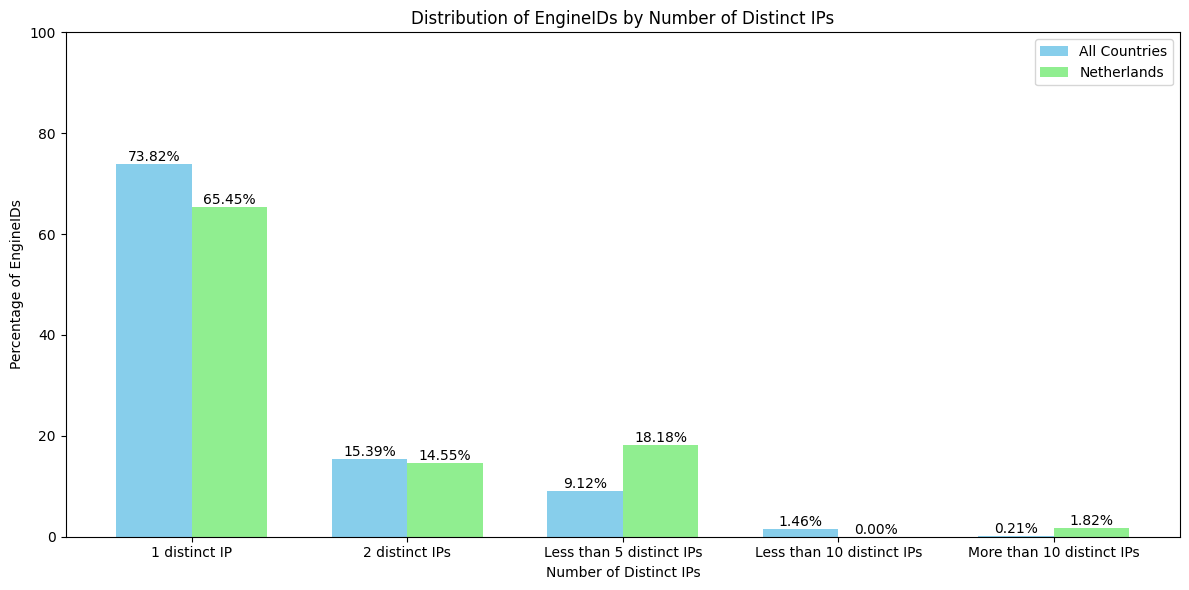

In [44]:
total_engine_ids = len(ip_count_per_engine)

# Count the number of EngineIDs with 1 distinct IP for total dataset and the Netherlands
count_1_ip_total = (ip_count_per_engine == 1).sum()
count_1_ip_nl = (ip_count_per_engine_nl == 1).sum()

# Calculate the percentage of EngineIDs with 1 distinct IP for total dataset and the Netherlands
percentage_1_ip_total = (count_1_ip_total / len(ip_count_per_engine)) * 100
percentage_1_ip_nl = (count_1_ip_nl / len(ip_count_per_engine_nl)) * 100

# Define the categories for the number of distinct IPs
categories = ['1 distinct IP', '2 distinct IPs', 'Less than 5 distinct IPs', 'Less than 10 distinct IPs', 'More than 10 distinct IPs']

# Count the number of EngineIDs falling into each category for the total dataset
counts_total = [
    count_1_ip_total,
    (duplicates <= 2).sum(),
    ((duplicates > 2) & (duplicates <= 5)).sum(),
    ((duplicates > 5) & (duplicates <= 10)).sum(),
    (duplicates > 10).sum()
]

# Count the number of EngineIDs falling into each category for the Netherlands
counts_nl = [
    count_1_ip_nl,
    (duplicates_nl <= 2).sum(),
    ((duplicates_nl > 2) & (duplicates_nl <= 5)).sum(),
    ((duplicates_nl > 5) & (duplicates_nl <= 10)).sum(),
    (duplicates_nl > 10).sum()
]

# Calculate the percentage of EngineIDs in each category for the total dataset
percentages_total = [(count / len(ip_count_per_engine)) * 100 for count in counts_total]

# Calculate the percentage of EngineIDs in each category for the Netherlands
percentages_nl = [(count / len(ip_count_per_engine_nl)) * 100 for count in counts_nl]

# Set the width of the bars
bar_width = 0.35

# Set the x coordinates for the bars
x = np.arange(len(categories))

# Plot the histogram
plt.figure(figsize=(12, 6))

# Plotting histogram for the total dataset
plt.bar(x - bar_width / 2, percentages_total, bar_width, color='skyblue', label='All Countries')

# Plotting histogram for the Netherlands with an offset
plt.bar(x + bar_width / 2, percentages_nl, bar_width, color='lightgreen', label='Netherlands')

plt.xlabel('Number of Distinct IPs')
plt.ylabel('Percentage of EngineIDs')
plt.title('Distribution of EngineIDs by Number of Distinct IPs')
plt.ylim(0, 100)
plt.xticks(x, categories)
plt.legend()

# Adding labels on top of the bars for the total dataset
for i, percentage in enumerate(percentages_total):
    plt.text(i - bar_width / 2, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding labels on top of the bars for the Netherlands
for i, percentage in enumerate(percentages_nl):
    plt.text(i + bar_width / 2, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipykernel_15649/29309800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_errors['AuthoritativeEngineTimes'] = pd.to_datetime(df_no_errors['AuthoritativeEngineTimes'], utc=True)
/tmp/ipykernel_15649/29309800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_errors['ScanTime'] = pd.to_datetime(df_no_errors['ScanTime'], utc=True)
/tmp/ipykernel_15649/29309800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

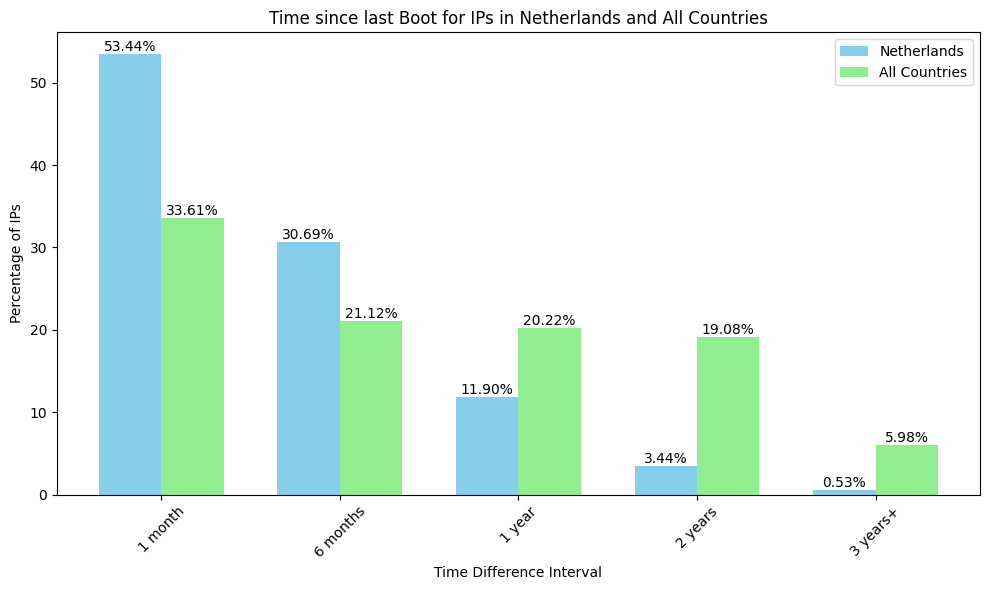

In [45]:
# Convert 'AuthoritativeEngineTimes' and 'ScanTime' to datetime objects with utc=True
df_no_errors['AuthoritativeEngineTimes'] = pd.to_datetime(df_no_errors['AuthoritativeEngineTimes'], utc=True)
df_no_errors['ScanTime'] = pd.to_datetime(df_no_errors['ScanTime'], utc=True)

# Calculate the difference between engine times and scanning time for each IP
df_no_errors['TimeDifference'] = df_no_errors['ScanTime'] - df_no_errors['AuthoritativeEngineTimes']

# Define intervals (in days) for different time differences
intervals = [(0, 30), (30, 180), (180, 365), (365, 365*2), (365*2, float('inf'))]
interval_labels = ['1 month', '6 months', '1 year', '2 years', '3 years+']

# Create a DataFrame for Netherlands
df_netherlands = df_no_errors[df_no_errors['IpCountry'] == 'Netherlands (Kingdom of the)']

# Create a DataFrame for all countries excluding Netherlands
df_all_countries = df_no_errors

# Categorize the differences into intervals for Netherlands
df_netherlands['TimeDifferenceCategory'] = pd.cut(df_netherlands['TimeDifference'].dt.days, bins=[interval[0] for interval in intervals] + [float('inf')], labels=interval_labels)

# Categorize the differences into intervals for all countries
df_all_countries['TimeDifferenceCategory'] = pd.cut(df_all_countries['TimeDifference'].dt.days, bins=[interval[0] for interval in intervals] + [float('inf')], labels=interval_labels)

# Count the total number of IPs for each category
total_ips_nl = df_netherlands.shape[0]
total_ips_all = df_all_countries.shape[0]

# Count the number of IPs falling into each interval for Netherlands and all countries
ip_count_per_interval_nl = df_netherlands['TimeDifferenceCategory'].value_counts(normalize=True) * 100
ip_count_per_interval_all = df_all_countries['TimeDifferenceCategory'].value_counts(normalize=True) * 100

# Plotting histograms on the same plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(interval_labels))

bars1 = plt.bar(index - bar_width/2, ip_count_per_interval_nl, bar_width, label='Netherlands', color='skyblue')
bars2 = plt.bar(index + bar_width/2, ip_count_per_interval_all, bar_width, label='All Countries', color='lightgreen')

plt.title('Time since last Boot for IPs in Netherlands and All Countries')
plt.xlabel('Time Difference Interval')
plt.ylabel('Percentage of IPs')
plt.xticks(index, interval_labels, rotation=45)
plt.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='bottom')

# Call the function to add labels
add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()